In [1]:
import pickle
import pandas as pd

In [2]:
with open( "final_smart_review.pickle", "rb" ) as file:
    smart = pickle.load(file)

In [3]:
from konlpy.tag import Okt

In [4]:
okt = Okt()

In [49]:
# 불용어가 저장되어 있는 텍스트 파일 로드
file_path = 'stopword.txt'

# 불용어 파일을 읽어서 set 형태로 저장
with open(file_path, 'r', encoding='utf-8') as f:
    stopwords = set([word.strip() for word in f.readlines()])

### 별점 기준으로 긍정리뷰 부정리뷰 분리

In [55]:
# 데이터 타입 실수로 변경
smart['별점'] = smart['별점'].astype('float32')

In [120]:
neg_df = smart[(smart['별점'] <= 2.5)]
pos_df = smart[(smart['별점'] >= 4)]

### 불용어 처리 함수 정의

In [114]:
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)
    words = [word for word, tag in pos_words if tag in ['Adjective','Noun'] if word not in stopwords]
    return words

### 긍정리뷰

In [126]:
# 형용사만 추출
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)
    words = [word for word, tag in pos_words if tag in ['Adjective'] if word not in stopwords]
    return words

In [127]:
cleaned_contents_list = []

for content in pos_df['내용']:
    # 공백 및 줄바꿈 제거
    cleaned_content = content.strip()  # 양쪽 공백 제거
    
    # 연속된 공백을 단일 공백으로 변환
    cleaned_content = ' '.join(cleaned_content.split())
    
    cleaned_contents_list.append(cleaned_content)

In [59]:
cleaned_contents_list

['너무좋고 편하고 조립도 뭐 낫배드입니다 너무너무좋아요 추천 !!! 고민 노',
 '바람시원하고 좋습니다 깔끔하기도하네용',
 '진짜 조용하고 바람이 자극적이지 않아 좋아요!!',
 '화이트톤의 디자인이라 더 예쁘고 무선이라 더 더 좋아요. 소리도 정말 안나요.',
 '배송도 빠르고 생각보다 더 좋네요 시원하고 조용합니다',
 '깔끔하고 조립하기 쉽습니다만족합니다',
 '미로 무선 선풍기 3년 전에 구입하고 마음에 들어서유선 선풍기 필요로 미로 선풍기 중에서 선택했어요. 전에 구입한 것도 엄청 편하고 디자인도 마음에 들었는데 팬이 작아서 이번에는 14인치 팬으로 픽.!!팬은 크고 좋은데 약간 투박한 감이 있네요.색도ㅜ화이트가 아닌 아이보리? 느낌 ,, 또 아쉽,,기능은 좋아요. 서큘레이터에 팬이 커서 시원하고 좋네요. 그런데 4단부터 틀어야 일반 1단계 느낌 ㅎ본체 연결된 유선인 줄 알았는데 아니고ㅎㅎ',
 '사진처럼 가구에 살짝 가려지는 위치라서 iot 쓸 겸사겸사 샀는데 너무 만족스러워요ㅠㅠ 살때 좀 비싸지 않나 했는데 가격을 모두 상쇄시켜주는 편리함! 예약 맞춰서 기상 시간에 켜지고 출근 시간에 꺼지게 하니까 아침에 번거롭게 불 끄러 왔다갔다 할 필요도 없고 너무 좋습니다어플로 누르면 살짝 로딩 + 스위치 누르는 기계 소리가 들리긴 하는데 불편함을 느낄 정도는 아니에요다만 어플 홈 화면 로딩? 이 좀 걸리고 안드로이드는 모르겠지만 아이폰은 위젯이 없다는게 좀 아쉽습니다 ㅠㅠ',
 'IOT 의 최대 장점인것 같아요!집 외부에서도 전등을 켜고 끌수가 있어서불꺼진 집에 혼자 들어올때도 미리 켜둘수 있고혹시나 깜빡하고 켜져있는지 꺼져있는지 확인도 가능하며연휴에 집을 오래 비워도 불을 켜고 끄면 사람이있는것 같아 도둑의 걱정도 덜 수 있을것 같아요!!개인적으로 작은 집이지만 누워서 꼼짝하기 싫을때너무 좋아요😍',
 '소리가 쬐끔 크긴한데 진짜 너무 좋고 편해요ㅠㅠ신축살다가 구축와서 불편했는데 너무 편해졌슺니다ㅠㅠ',
 '불켜놓고 누워있다가 불끄러일어나기 진짜 너

In [128]:
#추출된 단어들을 저장할 리스트
extracted_words_list = []

# cleaned_contents_list에 있는 각 텍스트에 대해 okt_pos_tagging 함수 호출하여 추출된 단어들 리스트에 저장
for text in cleaned_contents_list:
    extracted_words = okt_pos_tagging(text)
    extracted_words_list.append(extracted_words)

# 저장된 추출된 단어들 리스트 출력
for idx, extracted_words in enumerate(extracted_words_list, start=1):
    print(f'추출된 단어들: {extracted_words}')
    print()

추출된 단어들: ['좋다', '편하다', '좋다']

추출된 단어들: ['시원하다', '좋다', '깔끔하다']

추출된 단어들: ['조용하다', '좋다']

추출된 단어들: ['예쁘다', '좋다']

추출된 단어들: ['빠르다', '좋다', '시원하다', '조용하다']

추출된 단어들: ['깔끔하다', '만족하다']

추출된 단어들: ['편하다', '작다', '좋다', '박하다', '아니다', '아쉽다', '좋다', '시원하다', '좋다', '아니다']

추출된 단어들: ['만족스럽다']

추출된 단어들: ['만족스럽다', '비싸다', '편리하다', '번거롭다', '없다', '좋다', '불편하다', '아니다', '없다', '아쉽다']

추출된 단어들: ['편하다', '시끄럽다', '많다', '아니다']

추출된 단어들: ['가능하다', '작다', '싫다', '좋다']

추출된 단어들: ['힘들다', '편리하다']

추출된 단어들: ['좋다', '편하다', '불편하다', '편하다']

추출된 단어들: ['귀찮다', '편하다', '없다', '원하다', '좋다']

추출된 단어들: ['편하다', '좋다', '멀다', '불편하다']

추출된 단어들: ['간단하다', '불편하다', '편하다', '좋아하다']

추출된 단어들: ['번거롭다', '만족스럽다', '정확하다']

추출된 단어들: ['평평하다', '아니다', '둥그스름하다', '편하다', '가능하다']

추출된 단어들: ['깔끔하다', '이쁘다', '쾌적하다', '아쉽다', '비싸다']

추출된 단어들: ['솔직하다', '친절하다']

추출된 단어들: ['완전하다', '깔끔하다']

추출된 단어들: ['불편하다', '힘들다', '약하다', '만족하다']

추출된 단어들: ['힘들다', '연결하다', '편하다', '연결하다', '어렵다', '친절하다', '좋다', '귀찮다']

추출된 단어들: ['안되다', '안되다', '편하다', '오래되다', '만족하다', '친절하다', '좋다']

추출된 단어들: ['시끄럽

In [10]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [129]:
count_list = []

for words in extracted_words_list:
    count = Counter(words)
    count.most_common(100)
    count_list.append(count)

In [12]:
count_list

[Counter({'좋다': 2, '편하다': 1}),
 Counter({'시원하다': 1, '좋다': 1, '깔끔하다': 1}),
 Counter({'조용하다': 1, '좋다': 1}),
 Counter({'예쁘다': 1, '좋다': 1}),
 Counter({'빠르다': 1, '좋다': 1, '시원하다': 1, '조용하다': 1}),
 Counter({'깔끔하다': 1, '만족하다': 1}),
 Counter({'좋다': 3, '편하다': 1, '작다': 1, '박하다': 1, '아쉽다': 1, '시원하다': 1}),
 Counter({'만족스럽다': 1}),
 Counter({'만족스럽다': 1,
          '비싸다': 1,
          '편리하다': 1,
          '번거롭다': 1,
          '좋다': 1,
          '불편하다': 1,
          '아쉽다': 1}),
 Counter({'이렇다': 1, '편하다': 1, '시끄럽다': 1, '많다': 1}),
 Counter({'가능하다': 1, '작다': 1, '싫다': 1, '좋다': 1}),
 Counter({'힘들다': 1, '편리하다': 1}),
 Counter({'편하다': 2, '좋다': 1, '불편하다': 1}),
 Counter({'귀찮다': 1, '편하다': 1, '원하다': 1, '좋다': 1}),
 Counter({'안되다': 2, '연결하다': 1, '편하다': 1, '까맣다': 1, '빠르다': 1}),
 Counter({'편하다': 1, '좋다': 1, '멀다': 1, '불편하다': 1}),
 Counter({'간단하다': 1, '불편하다': 1, '편하다': 1, '좋아하다': 1}),
 Counter({'번거롭다': 1, '만족스럽다': 1, '정확하다': 1}),
 Counter({'당연하다': 1, '스럽다': 1, '만족스럽다': 1, '빈약하다': 1}),
 Counter({'평평하다': 1, '둥그스름하다': 1, '편

In [130]:
# 모든 Conter 객체를 합치기
total_counter = Counter()
for counter in count_list:
    total_counter += counter

In [64]:
total_counter

Counter({'좋다': 1688,
         '편하다': 400,
         '깔끔하다': 353,
         '예쁘다': 264,
         '이쁘다': 199,
         '없다': 192,
         '가능하다': 184,
         '만족하다': 167,
         '정확하다': 164,
         '빠르다': 163,
         '편리하다': 127,
         '저렴하다': 108,
         '가볍다': 95,
         '연결하다': 79,
         '아니다': 76,
         '괜찮다': 71,
         '안되다': 63,
         '다양하다': 61,
         '작다': 58,
         '많다': 54,
         '귀찮다': 53,
         '귀엽다': 52,
         '필요하다': 52,
         '간편하다': 50,
         '만족스럽다': 49,
         '튼튼하다': 43,
         '유용하다': 43,
         '불편하다': 42,
         '그렇다': 39,
         '원하다': 37,
         '신기하다': 37,
         '아쉽다': 35,
         '간단하다': 35,
         '빨르다': 32,
         '새롭다': 31,
         '적당하다': 30,
         '어렵다': 29,
         '좋아하다': 28,
         '자세하다': 27,
         '얇다': 27,
         '시원하다': 24,
         '착하다': 24,
         '비싸다': 21,
         '멀다': 21,
         '굳다': 20,
         '다르다': 20,
         '확실하다': 19,
         '친절하다': 17,
         '쉽

<function matplotlib.pyplot.show(close=None, block=None)>

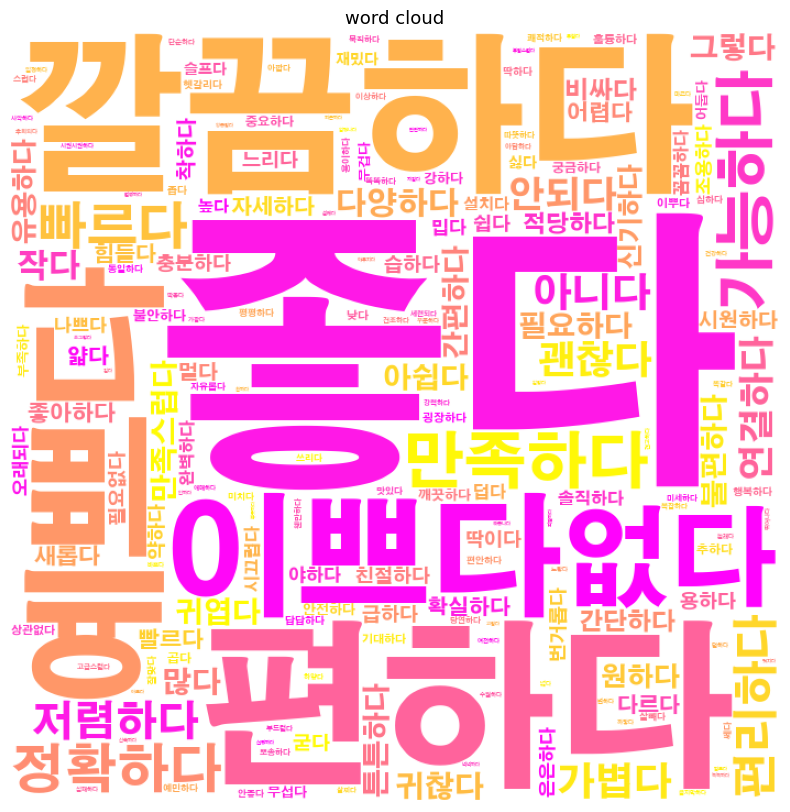

In [131]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path='C:\Windows\Fonts\H2GTRE.TTF',
                     width = 700,
                     height = 700,
                     background_color = 'white',
                     colormap = 'spring',
                     random_state = 1).generate_from_frequencies(total_counter)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('word cloud', size=13)
plt.show

### 부정리뷰 

In [119]:
neg_df

,작성자,작성날짜,별점,내용
21,하니614,2024.07.03,2.5,앱 연동이 되니까 너무 편 하 고 좋더라고요 근데 앱들어가서 버튼을 터치하기까지 렉...
90,어디든곶감,2024.02.15,2.3,스위치가 냉장고 옆쪽에 있어 스마트 스위치를 구매했지만 냉장고에 가려진거 때문인지 ...
140,던덩구,2024.03.28,2.5,리모콘을 같이 셋트로 하면 좋았을 듯 합니다
147,수먕,2022.08.22,2.0,계속 안붙고 떨어져서 끈끈이를 샀지만 뭐가 문제인지 붙이면 불이 켜지질않음 걍 난 ...
149,221124,2023.04.12,1.0,뭘 어떻게 만든건지 브라캣 다떨어지고 난리납니다 돈주고 쓰레기를 샀어요 사지마세요 ...
152,robbieshaw,2021.11.09,2.5,"생각보다 소리가 너무 커서 안좋아요, 내구성도 약해서 몇달이면 고장 날듯해요. 5만..."
180,jwhsgsuhdjw,2023.10.24,1.0,진짜 별로예요 이게 와이파이로 연결해서 쓰는건데 허구언날 무한로딩에 연결이 안될 때...
197,anny333,2023.01.22,2.5,핸드폰 연동해서 쓰는건데.......아침에 쓰고 저녁에 쓰려면 서비스연결이 안됩답니...
230,마이주문,2024.02.07,2.0,간편하고 설정쉬워서 좋은데 쓰다보니까 바닥에 탁탁쳐집니다 고장나겠어요 한쪽발 뛸때마...
445,soom26,2024.02.08,2.5,"1년 전에 구매하고 괜찮았어서 친정에 두려고 이번에 하나를 더 구매했는데, 두 기기..."


In [90]:
cleaned_contents_list = []

for content in neg_df['내용']:
    # 공백 및 줄바꿈 제거
    cleaned_content = content.strip()  # 양쪽 공백 제거
    
    # 연속된 공백을 단일 공백으로 변환
    cleaned_content = ' '.join(cleaned_content.split())
    
    cleaned_contents_list.append(cleaned_content)

In [115]:
#추출된 단어들을 저장할 리스트
extracted_words_list = []

# cleaned_contents_list에 있는 각 텍스트에 대해 okt_pos_tagging 함수 호출하여 추출된 단어들 리스트에 저장
for text in cleaned_contents_list:
    extracted_words = okt_pos_tagging(text)
    extracted_words_list.append(extracted_words)

# 저장된 추출된 단어들 리스트 출력
for idx, extracted_words in enumerate(extracted_words_list, start=1):
    print(f'추출된 단어들: {extracted_words}')
    print()

추출된 단어들: ['앱', '연동', '편', '고', '좋다', '앱', '버튼', '터치', '렉', '경우', '불편하다', '타이머', '설정', '점', '편하다', '거', '사용', '후', '진짜', '삶', '질', '수직', '상승']

추출된 단어들: ['스위치', '냉장고', '옆쪽', '스마트', '스위치', '구매', '냉장고', '때문', '미터', '거리', '리모컨', '작동', '안함']

추출된 단어들: ['리모콘', '셋트', '좋다', '듯']

추출된 단어들: ['계속', '끈끈이', '뭐', '문제', '붙이', '불', '난', '비싸다', '쓰레기', '개별', '마켓']

추출된 단어들: ['뭘', '브라', '캣', '난리', '돈', '쓰레기', '사지', '계속', '온', '집안', '부수']

추출된 단어들: ['생각', '소리', '커서', '안좋다', '구성', '약하다', '달이', '고장', '해', '사용', '모터', '안좋다', '거', '꼭', '서보모터', '소리', '기어', '플라스틱', '메탈', '사용', '지저분하다', '소리', '안나', '생각', '가격', '대비', '실제', '값', '만원']

추출된 단어들: ['진짜', '별로', '와이파이', '연결하다', '허구', '날', '무한', '로딩', '연결', '안되다', '많다']

추출된 단어들: ['핸드폰', '연동', '아침', '저녁', '서비스', '연결', '안되다', '다시', '연결', '그게', '복잡하다', '리모컨', '가격', '사악하다', '사용', '불편', '짜증', '뽀', '저렴', '다시', '상술', '당하다', '요', '당하다']

추출된 단어들: ['간편하다', '설정', '쉽다', '좋다', '보', '바닥', '탁탁', '고장', '한쪽', '발', '탁탁', '미치다', '스트레스']

추출된 단어들: ['전', '구매', '괜찮다', '친정', '려고', '더', '구매'

In [116]:
count_list = []

for words in extracted_words_list:
    count = Counter(words)
    count.most_common(100)
    count_list.append(count)

In [117]:
# 모든 Conter 객체를 합치기
total_counter = Counter()
for counter in count_list:
    total_counter += counter

<function matplotlib.pyplot.show(close=None, block=None)>

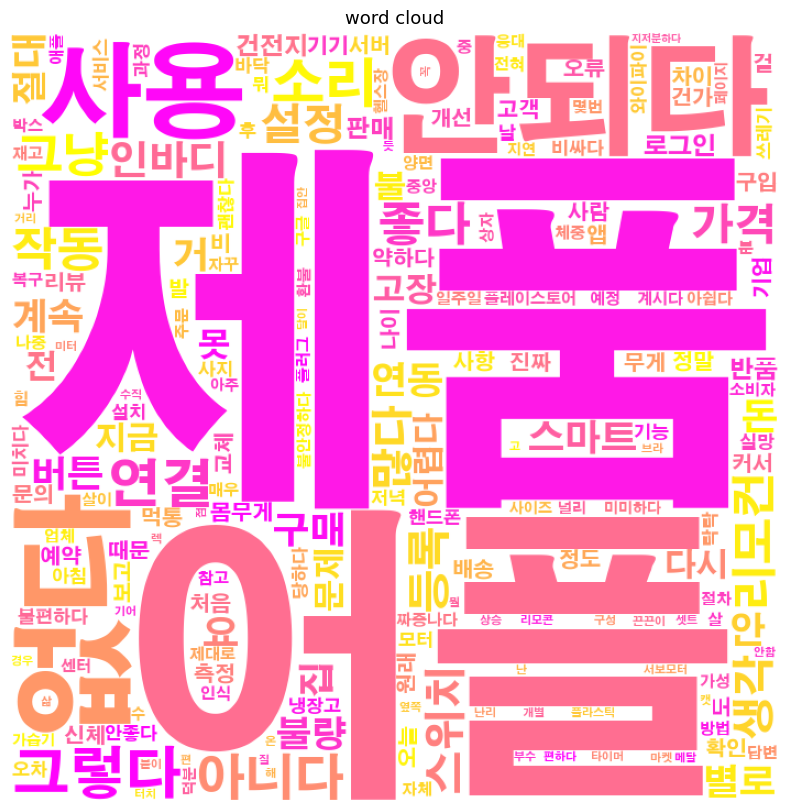

In [118]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path='C:\Windows\Fonts\H2GTRE.TTF',
                     width = 700,
                     height = 700,
                     background_color = 'white',
                     colormap = 'spring',
                     random_state = 1).generate_from_frequencies(total_counter)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('word cloud', size=13)
plt.show